In [1]:
import sys, os
parent_dir = os.path.abspath(os.path.join(os.path.dirname(os.path.abspath("__file__")), '..'))
src_path = os.path.join(parent_dir, 'src')
print(src_path)
sys.path.append(src_path)
import numpy as np
from scipy import interpolate
from numba import jit, float64
import time, multiprocessing, pickle
from U1Funcs import DMvRatesGen
from StatisticFuncs import *
from WIMPFuncs import C_SI
from Params import *
from U1PlotFuncs import *

d:\githubProjects\DistinctionLimit\src


In [2]:
#========================== Experimental setup =========================================#
ne = 10 # number of energy bins
E_th = 1*1e-6 # Threshold GeV
E_max = 5*1e-6 # Max recoil energy GeV
Nuc = Xe131
#========================== Initialize fog =========================================#
fogGen=Fog()
#========================== Model and other parameters =================================#
selList=np.array([0,1,3])
b0Level=0.
mDM = 5.5


In [3]:
modelParaList = [[np.log10(2e-5),np.log10(30e-3),1,1,1],\
    [np.log10(4e-5),np.log10(20e-3),1/3,1/3,-1], [np.log10(8e-4),np.log10(16e-3),[0,1,-1]]]
paraGenList = [StatisticClass(SpectrumNR(6., E_th, E_max, ne, Nuc,modelParaList[0],selList),'SMvsDMNP'),\
               StatisticClass(SpectrumNR(6., E_th, E_max, ne, Nuc,modelParaList[1],selList),'DMvsNP'),\
               StatisticClass(SpectrumNR(6., E_th, E_max, ne, Nuc,modelParaList[2],selList,mode='FD'),'DMvsNP')]

[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]


In [4]:
EthList = np.array([1, 1.5, 2.])*1e-6
paraGenList_Universal = [StatisticClass(SpectrumNR(6., E_th, E_max, ne, Nuc,modelParaList[0],selList),'SMvsDMNP') for E_th in EthList]
paraGenList_BL = [StatisticClass(SpectrumNR(6., E_th, E_max, ne, Nuc,modelParaList[1],selList),'DMvsNP') for E_th in EthList]
paraGenList_LmuLtau = [StatisticClass(SpectrumNR(6., E_th, E_max, ne, Nuc,modelParaList[2],selList,mode='FD'),'DMvsNP') for E_th in EthList]

[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]
[['0' 'hep']
 ['1' '8B']
 ['2' 'DSNB']
 ['3' 'Atm']
 ['4' 'Reactor']]


In [5]:
def myMul2(mDM, paraGenClass, FogGenClass, modelPara):
    exposureEndLog, dExpoLog, CL, b0Level = 8., 0.1, 0.9, 0.
    paraGenClass.setModel(modelPara)
    paraGenClass.setDMMass(mDM)
    NPDiscoveryExposure = biSearch(1., 8, findNPDiscoveryExposure, [paraGenClass, CL, b0Level], 0., 0)[0]
    #print([modelPara,NPDiscoveryExposure])
    paraList = exposureEndLog, dExpoLog, CL, b0Level, NPDiscoveryExposure
    return myMul(mDM, paraGenClass, FogGenClass, paraList)

myMul2(mDM, paraGenList[0], fogGen, modelParaList[0])

[-44.69721697097137,
 [array([-42.8125    , -42.8625    , -42.96916667, -43.04179078,
         -43.10460082, -43.17904236, -43.24342422, -43.31972866,
         -43.38572168, -43.46393564, -43.53158014, -43.5900835 ,
         -43.6594208 , -43.7193882 , -43.79046068, -43.85192877,
         -43.92477983, -43.97438056, -44.06774663, -44.12016267,
         -44.18228538, -44.23601314, -44.29969047, -44.35476276,
         -44.40239285, -44.45884333, -44.5257476 , -44.57129944,
         -44.62528681, -44.68927184, -44.73283612, -44.78446785,
         -44.84566102, -44.88732445, -44.93670333, -44.99522645,
         -45.03507198, -45.08229631, -45.12313897, -45.15846236,
         -45.20032711, -45.23653447, -45.26784893, -45.29493172,
         -45.31835467, -45.33861235, -45.35613251, -45.37128508,
         -45.38439001, -45.395724  , -45.40344075, -45.41011471,
         -45.41588678, -45.42087884, -45.42427768, -45.42830595,
         -45.43178985, -45.43480296, -45.43740889, -45.4404974 ,
    

In [6]:
from joblib import Parallel, delayed
from tqdm import tqdm

def resGen2(mDMList, paraGenClass, FogGenClass, paraList, n_jobs=20):
    time_start = time.perf_counter()

    # Define the function to be parallelized
    def parallel_function(mDM, paraGenClass, FogGenClass, paraList):
        return myMul(mDM, paraGenClass, FogGenClass, paraList)

    # Use joblib to parallelize the computation and visualize the progress with tqdm
    res1 = Parallel(n_jobs=n_jobs)(delayed(parallel_function)(mDM, paraGenClass, FogGenClass, paraList) for mDM in tqdm(mDMList))

    time_end = time.perf_counter()
    print("Time costed: {0} s.".format(time_end-time_start))
    
    resLabel = np.where(np.array([1 if isinstance(item, list) else 0 for item in res1])==1)
    mDMList = mDMList[resLabel]
    res1 = [item for item in res1 if isinstance(item, list)]
    return [mDMList, res1]

def contourGen(paraGenClass, FogGenClass):
    mDMList = np.logspace(-1,np.log10(10),400)
    E_th = paraGenClass._Spectrum._temp[0]
    mDMList=DMvRatesGen(mDMList, E_th, E_max, ne, Nuc, C_SI)[0]
    exposureEndLog, dExpoLog, CL, b0Level = 8., 0.1, 0.9, 0.
    paraGenClass.setDMMass(mDM)
    NPDiscoveryExposure = biSearch(1., 8, findNPDiscoveryExposure, [paraGenClass, CL, b0Level], 0., 0)[0]
    print(NPDiscoveryExposure)
    paraList = exposureEndLog, dExpoLog, CL, b0Level, NPDiscoveryExposure
    res=resGen2(mDMList,paraGenClass, FogGenClass,paraList)
    #return vsContourDatGen(res[0], res[1])
    return res


In [7]:
resListUniversal = {}
resListUniversal['0'] = contourGen(paraGenList_Universal[0], fogGen)
resListUniversal['1'] = contourGen(paraGenList_Universal[1], fogGen)
resListUniversal['2'] = contourGen(paraGenList_Universal[2], fogGen)

0.05859375


  0%|          | 0/102 [00:00<?, ?it/s]

100%|██████████| 102/102 [01:39<00:00,  1.02it/s]


Time costed: 109.66916449996643 s.
0.71484375


100%|██████████| 84/84 [00:31<00:00,  2.66it/s] 


Time costed: 73.20939570001792 s.
1.49609375


100%|██████████| 71/71 [00:00<00:00, 523.56it/s]


Time costed: 51.1533550999593 s.


In [13]:
def ax1Func(ax1, dat, color, label=False, rightLabel=False):
    n = 5
    colors = np.zeros([n,4])
    colors[0] = mpl.colors.to_rgba(color)
    colors[:] = mpl.colors.to_rgba(color)
    colors[:,3] = [0., 0.2, 0.4, 0.6, 0.8]
    cmap = mpl.colors.ListedColormap(colors, name='test')
    m,sig,n = vsContourDatGen(dat[0], dat[1])
    cnt = ax1.contourf(m,sig,n,np.array([0.,1., 5., 10., 100., 10000.]),\
                       colors=colors,antialiased=True)
    for c in cnt.collections:
        c.set_edgecolor("face")
    if label:
        ax1.fill_between([-2,-1],[1,1],[2,2],color=color,alpha=0.5,label=label)
    if rightLabel:
        cmap2 = mpl.colors.ListedColormap(colors[1:-1], name='test')
        cmap2.set_under(color=color, alpha=0.)
        cmap2.set_over(color=color, alpha=1.)
        im = plt.pcolormesh(-m,sig,n,vmax=4.,vmin=1,cmap=cmap2,rasterized=True,shading='auto')
        cbar_ax = fig.add_axes([0.912, 0.12, 0.008, 0.74])
        cbar = fig.colorbar(im, cax=cbar_ax,orientation='vertical',extend='max',extendfrac=0.08, \
                     ticks=[1,2,3,4])
        cbar.set_ticklabels([1,5,10,100])
        cbar_ax.yaxis.set_ticks_position('right')

LimitPlotFunc = MakeLimitPlot_DMNSI

def plot1(res, color,ax1, xLabel=True, yLabel=True, rightLabel=False):
    # data
    dataList = res[1]
    DMMassList=res[0]
    # plot
    expoLogList = np.linspace(1,1,1)
    sigma0ContourList = 10**np.transpose([np.interp(expoLogList, d[1][1], d[1][0]) for d in dataList])
    expoLogLabelList = [r"$10^2$ ${\rm ton}\cdot {\rm years}$"]
    lines=[]
    for i in range(len(expoLogList)):
        l1 = ax1.semilogy(DMMassList, sigma0ContourList[i], c='gray', linestyle='-.', label=expoLogLabelList[i])
        lines.extend(l1)
    labelLines(lines, xvals=[5.2], fontsize=15, outline_width=2)

    sigma0ContourDARWIN = 10**np.array([np.interp(np.log10(20), d[1][1], d[1][0]) for d in dataList])
    ax1.plot(5.8,np.interp(5.8,DMMassList,sigma0ContourDARWIN),'*',markersize=20,mfc='purple')
    l1 = ax1.semilogy(DMMassList,sigma0ContourDARWIN, c=[0,0,0,0], linestyle='-.', label="DARWIN\nPandaX-xT")
    labelLines(l1, xvals=6.1, color='purple',fontsize=18, outline_width=0,drop_label=True, yoffsets=-2e-47)
    #========================== limits =======================================================#
    ax1, lines=LimitPlotFunc(ax1,xmin=3.0e0,xmax=1e1,ymin=2e-46,ymax=1e-43,\
                facecolor='darkgray',edgecolor='darkgray',edgecolor_collected='darkgray',\
                alph=0.5,lfs=35,tfs=25)
    labelLines([lines[-1]], xvals=[7.5], fontsize=22,outline_color=[1,0,0,0], yoffsets=-2e-46)
    labelLines(lines[:-1], xvals=[8,6.9,9.2,4.3], fontsize=22,outline_color=[1,0,0,0],ha="left",va="bottom")
    #========================== contour plot =================================================#
    dat = res
    ax1Func(ax1, dat, color, rightLabel=rightLabel)
    #=========================== labels ===================================================#
    if xLabel:
        ax1.set_xlabel(r"DM mass [GeV]",fontsize=lfs)
    if yLabel:
        ax1.set_ylabel(r"DM-nucleon SI cross section[cm$^2$]",fontsize=lfs)
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10,labelsize=25)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)

C:\Users\ALoong\AppData\Local\Temp\ipykernel_26000\1146532429.py:11: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


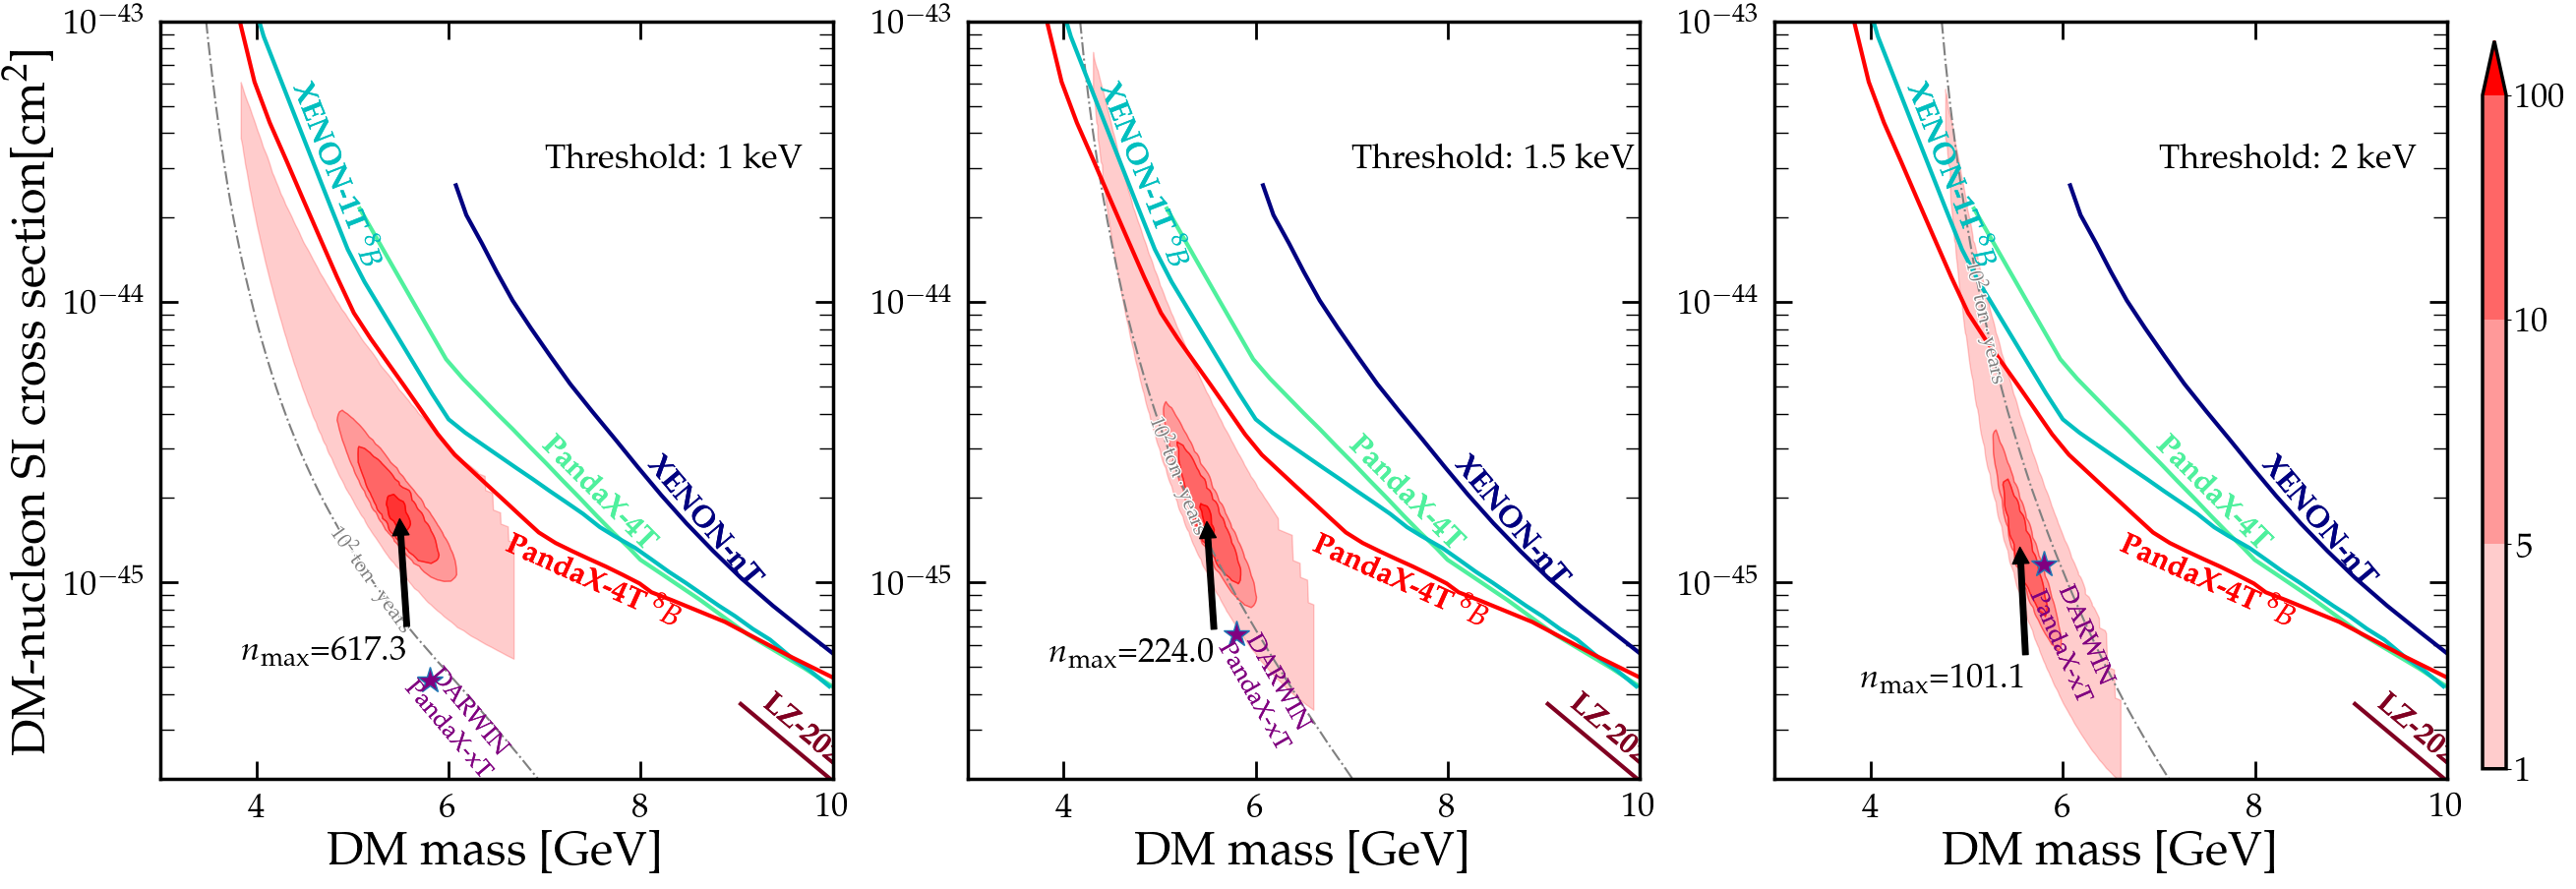

In [14]:
# Plot style
lw, tfs = 2.5, 25
lfs = 35
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mathpazo}'
#========================== exposure lines =================================================#
fig, ax = plt.subplots(1,3,figsize=(30,10))
plot1(resListUniversal['0'], 'r', ax[0], yLabel=True)
plot1(resListUniversal['1'], 'r', ax[1], yLabel=False)
plot1(resListUniversal['2'], 'r', ax[2], yLabel=False, rightLabel=True)

lfs2 = 25
textList = [r"Threshold: 1 keV", r"Threshold: 1.5 keV", r"Threshold: 2 keV"]
nMaxList = [maxCheck(res[0], res[1]) for res in resListUniversal.values()]
massFactor = 1
textFactor = 1-0.3
for i in range(3):
    ax[i].text(7, 3e-44, textList[i], fontsize=lfs2)
    ax[i].annotate(r'$n_{\rm max}$='+'{:.1f}'.format(nMaxList[i][2]), xy=(nMaxList[i][0]*massFactor,nMaxList[i][1]), xytext=(nMaxList[i][0]*massFactor*textFactor,nMaxList[i][1]*0.3),
                 arrowprops=dict(facecolor='black', shrink=0.05))
p1=fig

In [15]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
p1.savefig(os.path.join(myPathFig,"DMNSI_Threshold_1"+'.pdf'),bbox_inches='tight')
p1.savefig(os.path.join(myPathFig,'png','DMNSI_Threshold_1.png'),bbox_inches='tight')

In [16]:
resListBL = {}
resListBL['0'] = contourGen(paraGenList_BL[0], fogGen)
resListBL['1'] = contourGen(paraGenList_BL[1], fogGen)
resListBL['2'] = contourGen(paraGenList_BL[2], fogGen)
resListLmuLtau = {}
resListLmuLtau['0'] = contourGen(paraGenList_LmuLtau[0], fogGen)
resListLmuLtau['1'] = contourGen(paraGenList_LmuLtau[1], fogGen)
resListLmuLtau['2'] = contourGen(paraGenList_LmuLtau[2], fogGen)

-0.74609375


  0%|          | 0/102 [00:00<?, ?it/s]

100%|██████████| 102/102 [02:21<00:00,  1.38s/it]


Time costed: 155.21509249997325 s.
-0.03515625


100%|██████████| 84/84 [01:21<00:00,  1.03it/s]


Time costed: 96.12729149998631 s.
0.77734375


100%|██████████| 71/71 [00:54<00:00,  1.30it/s]


Time costed: 71.27191380003933 s.
0.66796875


100%|██████████| 102/102 [02:02<00:00,  1.20s/it]


Time costed: 135.18424329999834 s.
1.54296875


100%|██████████| 84/84 [01:23<00:00,  1.01it/s]


Time costed: 97.32935849996284 s.
2.55859375


100%|██████████| 71/71 [00:59<00:00,  1.19it/s]


Time costed: 74.29607229994144 s.


C:\Users\ALoong\AppData\Local\Temp\ipykernel_26000\1146532429.py:11: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


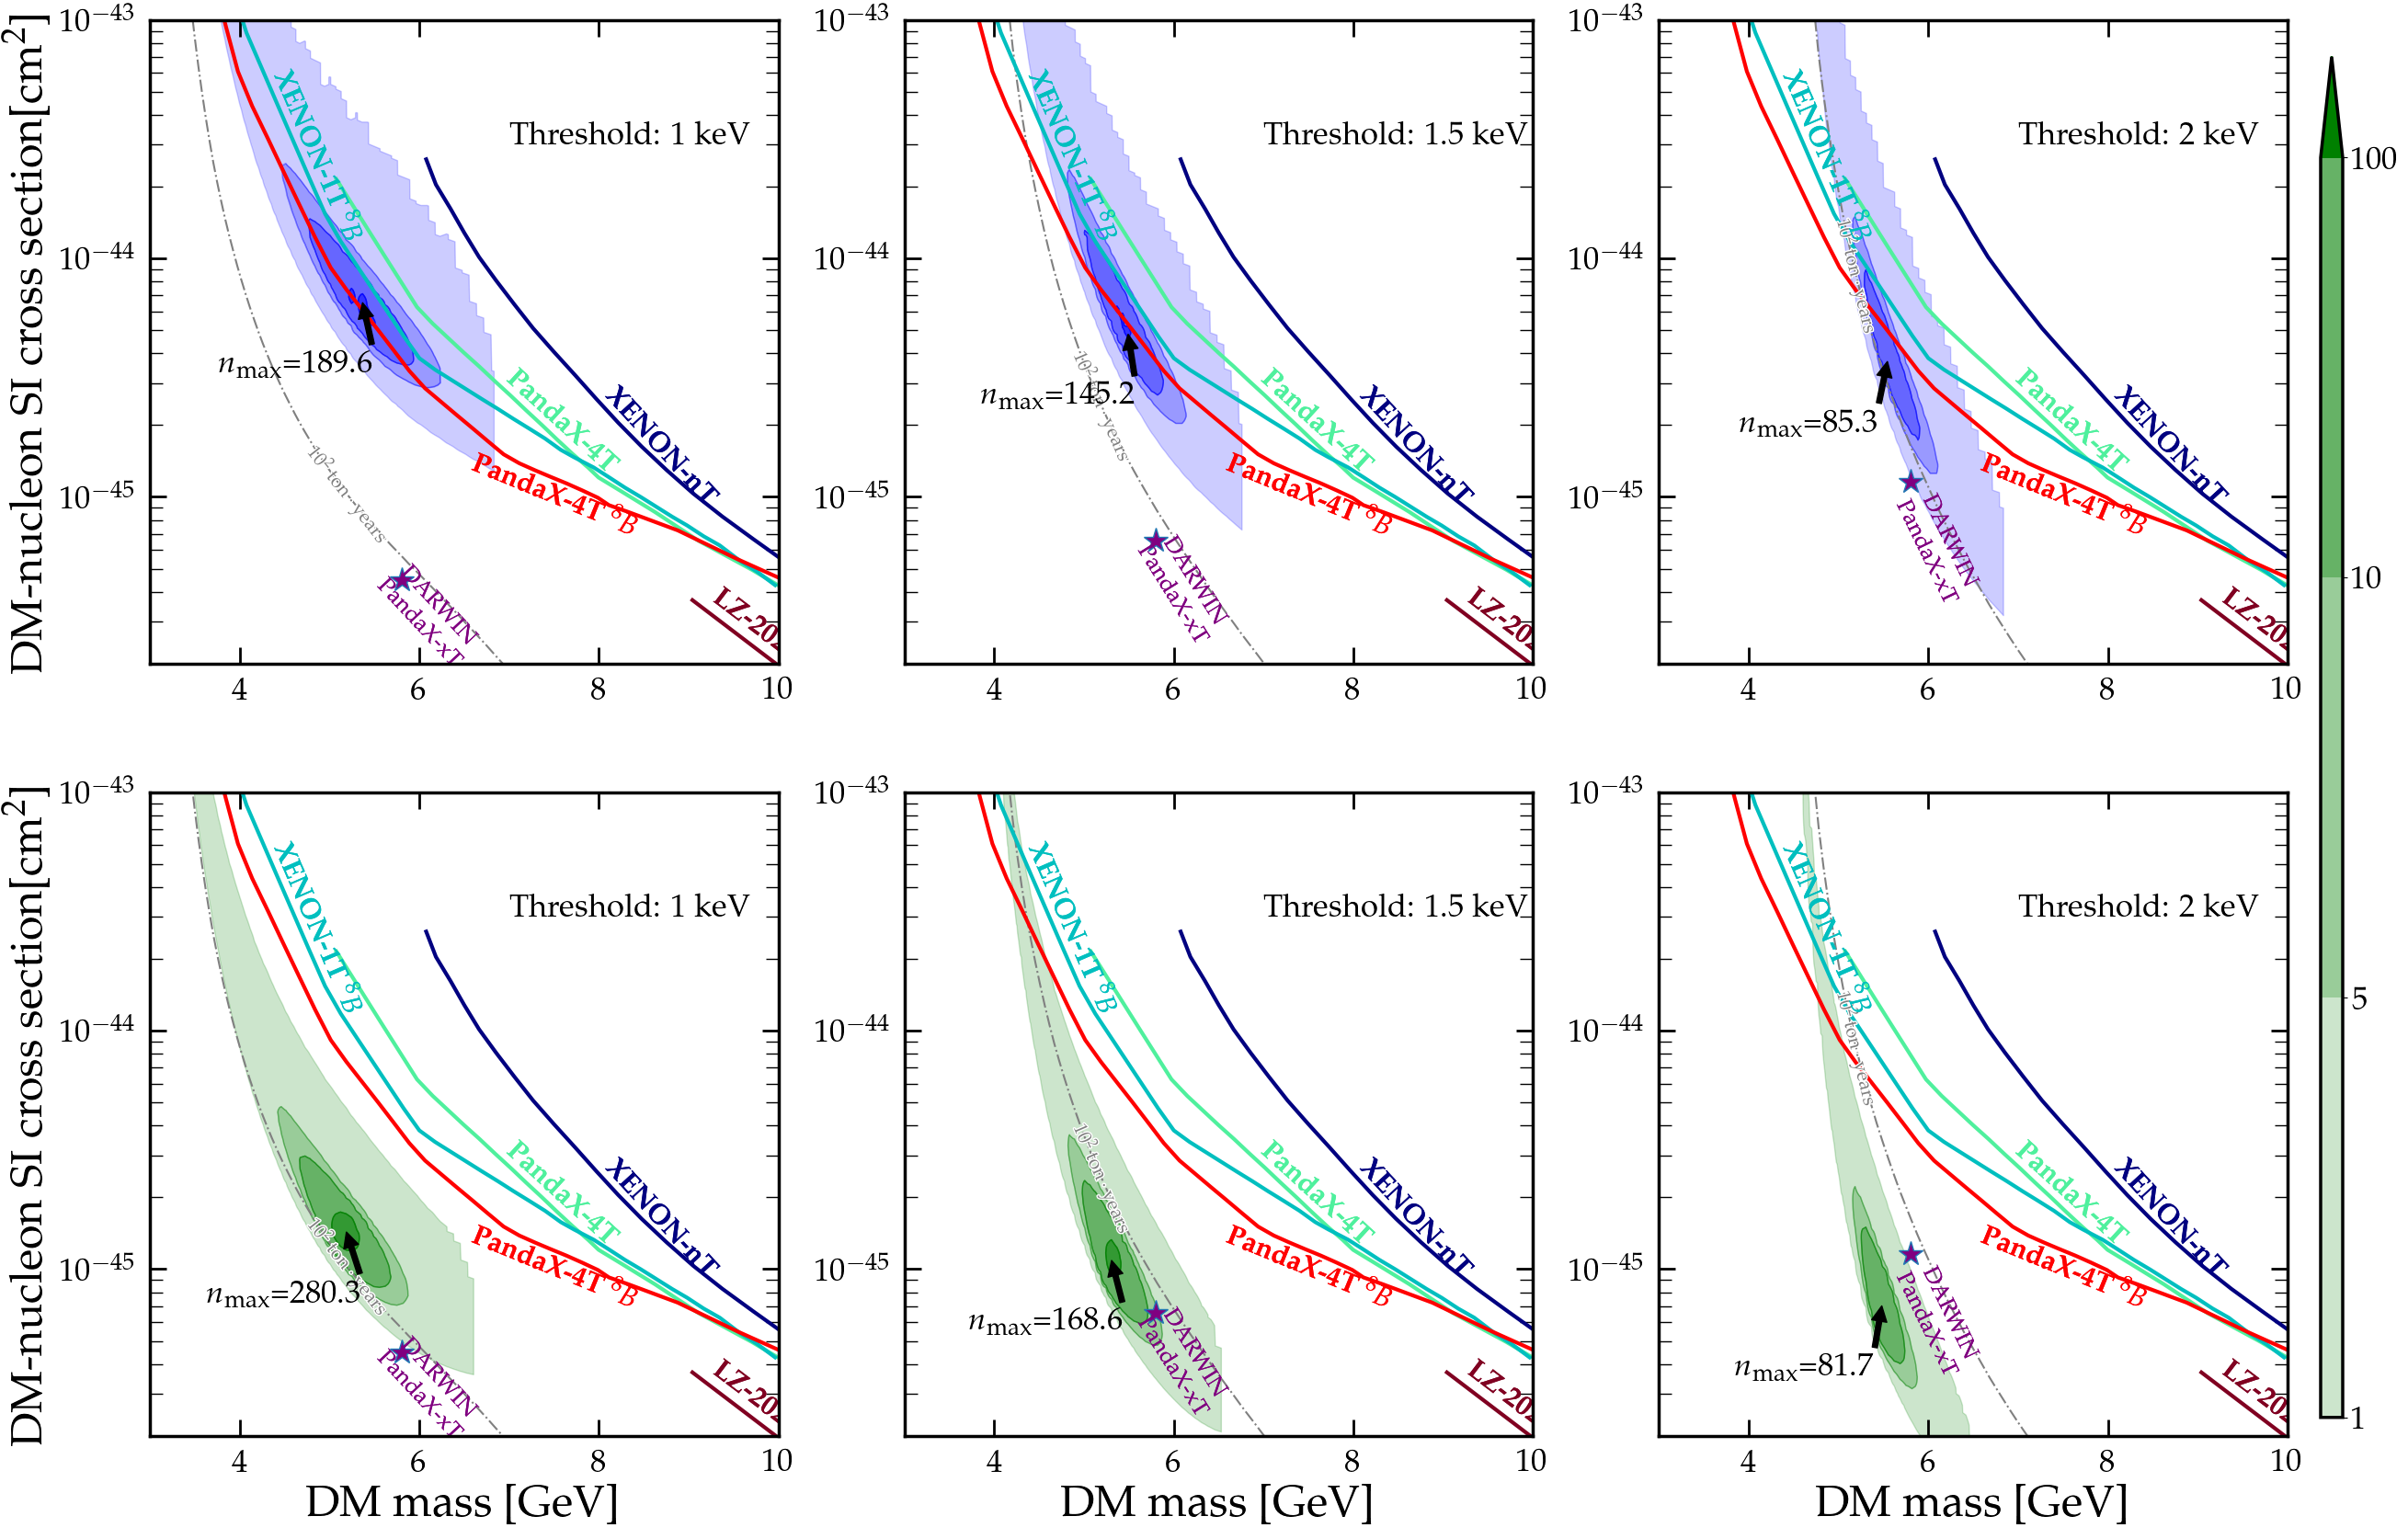

In [18]:
fig, ax = plt.subplots(2,3,figsize=(30,20))
plot1(resListBL['0'], 'b', ax[0][0], xLabel=False, yLabel=True)
plot1(resListBL['1'], 'b', ax[0][1], xLabel=False, yLabel=False)
plot1(resListBL['2'], 'b', ax[0][2], xLabel=False, yLabel=False)
plot1(resListLmuLtau['0'], 'g', ax[1][0], yLabel=True)
plot1(resListLmuLtau['1'], 'g', ax[1][1], yLabel=False)
plot1(resListLmuLtau['2'], 'g', ax[1][2], yLabel=False, rightLabel=True)

for i in range(2):
    nMaxList = [maxCheck(res[0], res[1]) for res in [resListBL, resListLmuLtau][i].values()]
    for j in range(3):
        ax[i][j].text(7, 3e-44, textList[j], fontsize=lfs2)
        ax[i][j].annotate(r'$n_{\rm max}$='+'{:.1f}'.format(nMaxList[j][2]), xy=(nMaxList[j][0]*massFactor,nMaxList[j][1]), xytext=(nMaxList[j][0]*massFactor*textFactor,nMaxList[j][1]*0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
p2 = fig

In [19]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
p2.savefig(os.path.join(myPathFig,"DMNSI_Threshold_2"+'.pdf'),bbox_inches='tight')
p2.savefig(os.path.join(myPathFig,'png','DMNSI_Threshold_2.png'),bbox_inches='tight')